In [219]:
import matplotlib.pyplot as plt
from math import sin, cos, pi

In [220]:
class point2line:
    def __init__(self, point):
        self.x, self.y = self.initial = point
        self.plotArr = point
    
    def transfer(self, change, plot=False):
        self.plotArr = (self.x, self.x+change[0]), (self.y, self.y+change[1])
        self.final = (self.x+ change[0], self.y+ change[1])
        if plot: self.plotLine()
        return self.final
    
    def lenDegree(self, point, plot=False):
        ln, ang = point
        change = ln*cos(self.d2r(ang)), ln*sin(self.d2r(ang))
        self.plotArr = (self.x, self.x+change[0]), (self.y, self.y+change[1])
        self.final = (self.x+ change[0], self.y+ change[1])
        if plot: self.plotLine()
        return self.final
    
    def lenRadian(self, point, plot=False):
        ln, ang = point
        change = ln*cos(ang), ln*sin(ang)
        self.plotArr = (self.x, self.x+change[0]), (self.y, self.y+change[1])
        self.final = (self.x+ change[0], self.y+ change[1])
        if plot: self.plotLine()
        return self.final
    
    def d2r(self, deg):
        return pi* deg/ 180
    
    def plotLine(self):
        plt.plot(self.plotArr[0], self.plotArr[1])

In [271]:
class codes2truss:
    def __init__(self, drawcodes):
        drawCodes = [_ for _ in script.split('\n') if (_!= '' and _[0]!='#')]
        self.drawCodes = [_.split(' ') for _ in drawCodes]
    
    def drawTruss(self):
        self.dataDict = {}
        self.dataDict[self.drawCodes[0][0]] = (0, 0), 'start', '.'
        
        for section in self.drawCodes:
            if len(section) == 6:
                pt1, pt2, nm, arg1, arg2, ornt = section
                pt1, pt2, ornt = map(lambda x: x.upper(), (pt1, pt2, ornt))
                arg1, arg2 = map(lambda x: float(x), (arg1, arg2))

                if ornt == 'L': 
                    self.dataDict[pt2] = point2line(self.dataDict[pt1][0]).transfer((arg1,arg2), plot=True), pt1[0], '.'
                elif ornt == 'D':  
                    self.dataDict[pt2] = point2line(self.dataDict[pt1][0]).lenDegree((arg1,arg2), plot=True), pt1[0], '.'
                elif ornt == 'R': 
                    self.dataDict[pt2] = point2line(self.dataDict[pt1][0]).lenRadian((arg1,arg2), plot=True), pt1[0], '.'
                else:
                    print('Only L, D, R allowed')
            
            if len(section) == 2:
                pt, symbol = section
                pt, symbol = pt.upper(), ('s' if symbol=='+' else symbol)
                self.dataDict[pt] = self.dataDict[pt][0], self.dataDict[pt][1], symbol
                plt.plot(self.dataDict[pt][0][0], self.dataDict[pt][0][1], 'b'+ symbol, ms=12)
    
    def help(self):
        self.Help = '''
        # Sample format:

        F B > 60 60 L
        B C > 20 45 D
        C D > 10 0 R
        F ^
        B o
        C +
        B *

        # Understanding
        ########################################################################
        # You can comment as this
        # You can leave blank spaces
        # Format is first_pt, second_pt, '>', arg1, arg2, "L or D or R"

        # F B > 60 60 L
        # L being simple transfer of pt from pt1 to pt2 by giving diffirence

        # B C > 20 45 D
        # D being line length given in arg1 and angle given in degree in arg2

        # C D > 10 0 R
        # R being line length given in arg1 and angle given in radian in arg2

        # Joints and supports as: point, type
        # F ^
        # B o
        # C +
        # B *
        # o roller, ^ hinge, + or s fixed, * for hinge between truss
        ########################################################################
        '''.replace('        ', '')
        print(self.Help)

In [280]:
script = '''
A B > 25 0 L
B C > -9 12 L
C A > -16 -12 L

A ^
B o
'''

{'A': ((0.0, 0.0), 'C', '^'),
 'B': ((25.0, 0.0), 'A', 'o'),
 'C': ((16.0, 12.0), 'B', '.')}

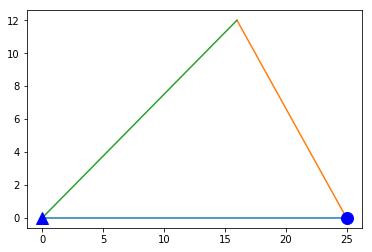

In [281]:
truss = codes2truss(script)
truss.drawTruss()
truss.drawCodes
truss.dataDict 